In [1]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#entradas
inputs = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

#Salidas
labels = np.array([0,1,1,1])

In [59]:
# Definicion de hiperparametros
learning_rate = 0.50
bias = 0.560
epochs = 20
weights = [0.100, 0.250] #NO es hiperparametro

In [61]:
#Clase Perceptron
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs=20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = weights
        self.bias = bias
        self.epochs = epochs

    #Funcion de activacion
    def activation(self, z):
        return 1 if z > 0 else 0

    def predict(self, input_x, weights_ajustados, bias_weights):
        z = np.dot(input_x, weights_ajustados) + bias_weights
        y_pred = self.activation(z)
        return y_pred
    
    def fit(self):
        # Abrir un ciclo de acuerdo a las iteraciones (Epochs)
        for epoch in range(self.epochs):
            print(f"Epoch{epoch+1}/{self.epochs}", end = " ")

            #Variables para controlar el error en cada Epoch
            total_error = 0
            
            # Abrir otro ciclo para recorrer las entradas
            for input,label in zip(self.inputs, self.labels):
                #print(f"Input{input}, Label: {label}")
                # Calcular la funcion ponderada Z
                z = np.dot(input, self.weights) + self.bias
                #Calcular y predicha
                y_pred = self.activation(z)
                #Calculamos el error
                error = label - y_pred
                total_error += abs(error)
                #Calculamos el Delta W
                delta_w = self.learning_rate * error * input
                #Actualizar los weights
                self.weights = self.weights + delta_w
                #Actualziar el bias
                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias
                
            #Calcular el error promedio
            average_error = total_error/len(self.labels)
            print(f"Average Error: {average_error}")
            
        # Retornar los pesos y los bias actualizados
        return self.weights, self.bias

In [69]:
# Crear el objeto perceptron
perceptron = Perceptron(inputs, labels, learning_rate, weights, bias, 20)

#Entrenar el perceptron
w, b = perceptron.fit()
print(f"Weights fit: {w}, Bias fit:{b}")

Epoch1/20 Average Error: 1.5
Epoch2/20 Average Error: 1.5
Epoch3/20 Average Error: 1.5
Epoch4/20 Average Error: 1.5
Epoch5/20 Average Error: 1.5
Epoch6/20 Average Error: 1.5
Epoch7/20 Average Error: 1.5
Epoch8/20 Average Error: 1.5
Epoch9/20 Average Error: 1.5
Epoch10/20 Average Error: 1.5
Epoch11/20 Average Error: 1.5
Epoch12/20 Average Error: 1.5
Epoch13/20 Average Error: 1.5
Epoch14/20 Average Error: 1.5
Epoch15/20 Average Error: 1.5
Epoch16/20 Average Error: 1.5
Epoch17/20 Average Error: 1.5
Epoch18/20 Average Error: 1.5
Epoch19/20 Average Error: 1.5
Epoch20/20 Average Error: 1.5
Weights fit: [170.1  230.25], Bias fit:60.56


In [65]:
# Realizar nuestras predicciones
print(f"[1,2]-->{perceptron.predict([1,2],w,b)}")
print(f"[2,3]-->{perceptron.predict([2,3],w,b)}")
print(f"[3,4]-->{perceptron.predict([3,4],w,b)}")
print(f"[4,5]-->{perceptron.predict([4,5],w,b)}")

[1,2]-->1
[2,3]-->1
[3,4]-->1
[4,5]-->1


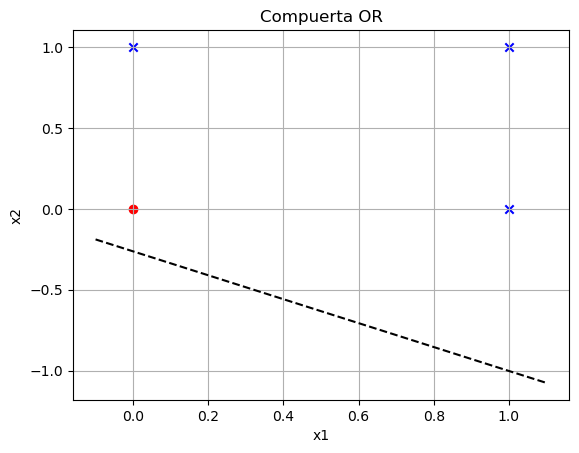

In [93]:
# Gráfico
for i in range(len(inputs)):
    if labels[i] == 0:
        plt.scatter(inputs[i][0], inputs[i][1], c='red', marker='o')
    else:
        plt.scatter(inputs[i][0], inputs[i][1], c='blue', marker='x')

# Recta de decisión
x_vals = np.linspace(-0.1, 1.1, 100)
y_vals = -(w[0]*x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--')
plt.title("Compuerta OR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

Accuracy (sklearn): 1.0


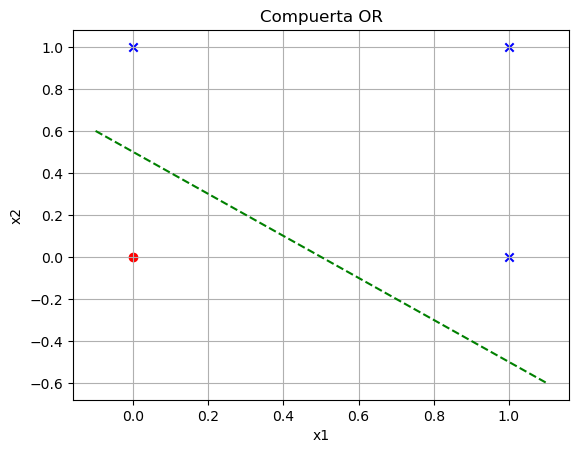

In [91]:
from sklearn.linear_model import Perceptron

# Modelo de sklearn
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(inputs, labels)
labels_preds_sklearn = clf.predict(inputs)
accuracy_sklearn = np.mean(labels_preds_sklearn == labels)
print("Accuracy (sklearn):", accuracy_sklearn)

# Gráfico
for i in range(len(inputs)):
    if labels[i] == 0:
        plt.scatter(inputs[i][0], inputs[i][1], c='red', marker='o')
    else:
        plt.scatter(inputs[i][0], inputs[i][1], c='blue', marker='x')

# Recta de decisión
x_vals = np.linspace(-0.1, 1.1, 100)
y_vals = -(clf.coef_[0][0]*x_vals + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(x_vals, y_vals, 'g--')
plt.title("Compuerta OR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()
